# Linear Regression with PyTorch
## 1. Simple Linear Regression Basics
- Allows us to understand **relationship** between two **continuous variables**
- Example
    - x: independent variable
        - weight
    - y: dependent variable
        - height
- $y = \alpha x + \beta$

**Example :**

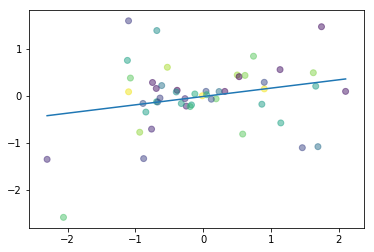

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

The Line is trying to fit the data point.

### Aim of Linear Regression
- Minimize the distance between the points and the line ($y = \alpha x + \beta$)
- Adjusting
    - Coefficient: $\alpha$
    - Bias/intercept: $\beta$

___
## 2. Building a Linear Regression Model with PyTorch

### Example
- Coefficient: $\alpha = 2$
- Bias/intercept: $\beta = 1$
- Equation: $y = 2x + 1$

#### Building a Toy Dataset
Let's say we have function :

$y = 2x + 1$

Now, we wan't to know if our model will be able to find the function pattern

In [2]:
x_values = [i for i in range(11)]
print(x_values)

x_train = np.array(x_values, dtype=np.float32)
x_train.shape

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


(11,)

Now, we have to reshape the `x_train` into 2D (Column Array)

In [3]:
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [4]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

Now, we Create y value

$y = 2x + 1$

In [5]:
y_value = [2*i+1 for i in x_values]
y_value

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [6]:
y_train = np.array(y_value, dtype=np.float32)
print(y_train)
y_train.shape

[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21.]


(11,)

Now, we have to reshape the y_train into 2D (Column Array)

In [7]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [8]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

___
### Building Model

**Import torch library**

In [9]:
import torch
import torch.nn as nn

**Create Model**
1. Linear model
    - True Equation: 
        $y = 2x + 1$
2. Forward
    - Example
        - Input $x = 1 $
        - Output $\hat y = ?$

In [10]:
# Create Linear Regression Class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

**Instantiate Model Class**
- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [11]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

**Instantiate Loss Class**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [12]:
criterion = nn.MSELoss()

**Instantiate Optimizer Class**
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $ y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$

In [13]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Train Model**
- 1 epoch: going through the whole x_train data once
    - 100 epochs: 
        - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
        
- Process 
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [14]:
epochs = 100

In [15]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch with inputs requires grad
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)
    
    # Clear Gradient w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward prop to get output
    # Think about like doing y = F(x)
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print(f'epoch =  {epoch}, loss = {loss.item()}')

epoch =  1, loss = 294.02264404296875
epoch =  2, loss = 24.5371150970459
epoch =  3, loss = 2.549837589263916
epoch =  4, loss = 0.7502802014350891
epoch =  5, loss = 0.5974398255348206
epoch =  6, loss = 0.5789852142333984
epoch =  7, loss = 0.5715587139129639
epoch =  8, loss = 0.5650975108146667
epoch =  9, loss = 0.558781087398529
epoch =  10, loss = 0.5525403022766113
epoch =  11, loss = 0.5463701486587524
epoch =  12, loss = 0.5402689576148987
epoch =  13, loss = 0.5342356562614441
epoch =  14, loss = 0.5282701253890991
epoch =  15, loss = 0.5223714709281921
epoch =  16, loss = 0.5165380835533142
epoch =  17, loss = 0.510769784450531
epoch =  18, loss = 0.5050660967826843
epoch =  19, loss = 0.49942639470100403
epoch =  20, loss = 0.4938490390777588
epoch =  21, loss = 0.48833420872688293
epoch =  22, loss = 0.4828813076019287
epoch =  23, loss = 0.47748908400535583
epoch =  24, loss = 0.47215723991394043
epoch =  25, loss = 0.46688443422317505
epoch =  26, loss = 0.461670815944

**Compare Data**

Desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [16]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.16578446],
       [ 2.285919  ],
       [ 4.4060535 ],
       [ 6.5261884 ],
       [ 8.646323  ],
       [10.766458  ],
       [12.886593  ],
       [15.006727  ],
       [17.126862  ],
       [19.246996  ],
       [21.36713   ]], dtype=float32)

In [17]:
# y = 2x + 1
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

**Plot Graph**

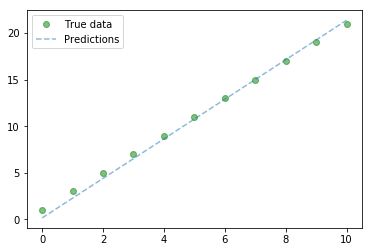

In [18]:
# Clear figure
plt.clf()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

**Save Model**

In [19]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [23]:
!ls | grep awesome_model.pkl

awesome_model.pkl


**Load Model**

In [21]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

**Show Model Weight**

Desired Params : 
* `weight = 2`
* `bias = 1`

$$y = 2x + 1$$

In [24]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[2.1201]])),
             ('linear.bias', tensor([0.1658]))])

___
### CPU Summary 

In [26]:
import torch
import torch.nn as nn

"""
Step 1: Create Model Class
"""
class LinearRegressionModel_CPU(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel_CPU, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

    
"""
Step 2: Instantiate Model Class
"""
input_dim = 1
output_dim = 1

model = LinearRegressionModel_CPU(input_dim, output_dim)


"""
Step 3: Instantiate Loss Class
"""
criterion = nn.MSELoss()


"""
Step 4: Instantiate Optimizer Class
"""
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


"""
Step 5: Train the Model
"""
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()

In [36]:
predict = model(torch.from_numpy(x_train).requires_grad_()).data.numpy().astype('int')
predict

array([[ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [14],
       [16],
       [18],
       [20]])

In [34]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

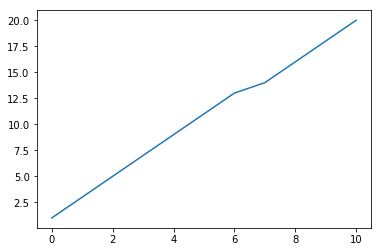

In [37]:
plt.plot(x_train, predict)